In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ihelon_coffee_sales_path = kagglehub.dataset_download('ihelon/coffee-sales')

print('Data source import complete.')


100%|██████████| 42.9k/42.9k [00:00<00:00, 4.88MB/s]

Extracting files...
Data source import complete.


![beverage-1853905_640.jpg](attachment:d32aafc3-efb3-4984-8b58-19d713987de2.jpg)

## Objective

This dataset contains detailed records of coffee sales from a vending machine. The dataset spans from March 2024 to Present time, capturing daily transaction data. In this notebook, we are going to use EDA to discover the customer's purchasing patterns and sales trends which can aid in the inventory planning.

## Import packages

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Load data

In [ ]:
coffee_data = pd.read_csv(os.path.join(ihelon_coffee_sales_path, 'index_1.csv'))

## EDA

In [ ]:
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [ ]:
coffee_data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
coffee_data.duplicated().sum()

np.int64(0)

In [ ]:
coffee_data.describe().T

,count,mean,std,min,25%,50%,75%,max
money,3636.0,31.746859,4.919926,18.12,27.92,32.82,35.76,40.0


In [ ]:
coffee_data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,3636,2,card,3547
card,3547,1316,ANON-0000-0000-0012,129
coffee_name,3636,8,Americano with Milk,824


- There are 1033 transactions in the data.
- 89 missing values in the column 'card'.
- No duplicates.
- 2 unique values of 'cash_type'.
- 8 different coffee types with 'Americano with Milk' is the most popular product.

Let's check the transactions with missing value in 'card'.

In [ ]:
coffee_data[coffee_data['card'].isnull()]['cash_type'].value_counts()

,count
cash_type,
cash,89


All of the transactions with null 'card' information are from cash users.

<Axes: >

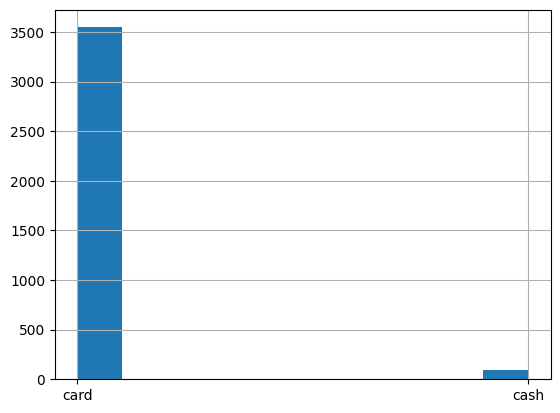

In [ ]:
coffee_data['cash_type'].hist()

In [ ]:
coffee_data['cash_type'].value_counts(normalize=True)

,proportion
cash_type,
card,0.975523
cash,0.024477


~92% of the transactions are from card users.

In [ ]:
pd.DataFrame(coffee_data['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,22.66
Latte,21.51
Americano,15.90
Cappuccino,13.78
Cortado,8.03
Hot Chocolate,7.76
Cocoa,6.68
Espresso,3.69


Americano with Milk and Latte are our most popular coffee products. In the second tier are Cappuccino and Americano, while Cortado, Hot Chocolate, Espresso, and Cocoa are less popular.

Next, let's conduct data transformations for further analysis.

In [ ]:
#Convert date and datetime to datetme format
coffee_data['date']=pd.to_datetime(coffee_data['date'])
coffee_data['datetime']=pd.to_datetime(coffee_data['datetime'])
#Create column of Month, Weekdays, and Hours
coffee_data['month']=coffee_data['date'].dt.strftime('%Y-%m')
coffee_data['day']=coffee_data['date'].dt.strftime('%w')
coffee_data['hour']=coffee_data['datetime'].dt.strftime('%H')

In [ ]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
 6   month        3636 non-null   object        
 7   day          3636 non-null   object        
 8   hour         3636 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 255.8+ KB


In [ ]:
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,5,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,5,13


In [ ]:
[coffee_data['date'].min(),coffee_data['date'].max()]

[Timestamp('2024-03-01 00:00:00'), Timestamp('2025-03-23 00:00:00')]

The time range of this data set is from 2023-3-1 to 2024-7-31

Let's first check the overal revenue by products.

In [ ]:
revenue_data = coffee_data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

Text(0.5, 0, 'Revenue')

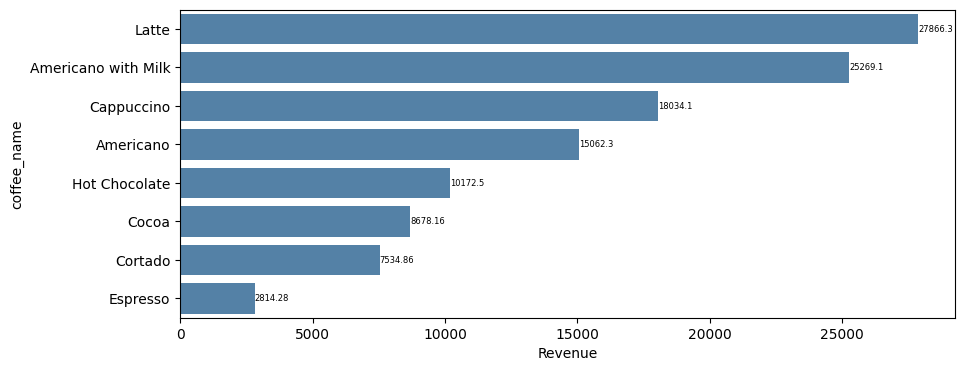

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=revenue_data,x='money',y='coffee_name',color='steelblue')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Revenue')

Latte is the product with the highest revenue, while Expresso is the one at the bottom. Then let's check the monthly data.

In [ ]:
monthly_sales = coffee_data.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56
5,2024-08,37,72,34,11,40,14,6,58
6,2024-09,32,104,41,9,41,12,11,94
7,2024-10,44,82,44,32,34,12,58,120
8,2024-11,25,52,26,35,13,3,37,68
9,2024-12,27,57,38,21,31,12,26,47


In [ ]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,117.0
Americano with Milk,34.0,104.0
Cappuccino,20.0,55.0
Cocoa,5.0,56.0
Cortado,2.0,41.0
Espresso,3.0,17.0
Hot Chocolate,6.0,58.0
Latte,31.0,120.0


([<matplotlib.axis.XTick at 0x7ed121e9fc90>,
 [Text(0, 0, '2024-03'),
  Text(1, 0, '2024-04'),
  Text(2, 0, '2024-05'),
  Text(3, 0, '2024-06'),
  Text(4, 0, '2024-07'),
  Text(5, 0, '2024-08'),
  Text(6, 0, '2024-09'),
  Text(7, 0, '2024-10'),
  Text(8, 0, '2024-11'),
  Text(9, 0, '2024-12'),
  Text(10, 0, '2025-01'),
  Text(11, 0, '2025-02'),
  Text(12, 0, '2025-03')])

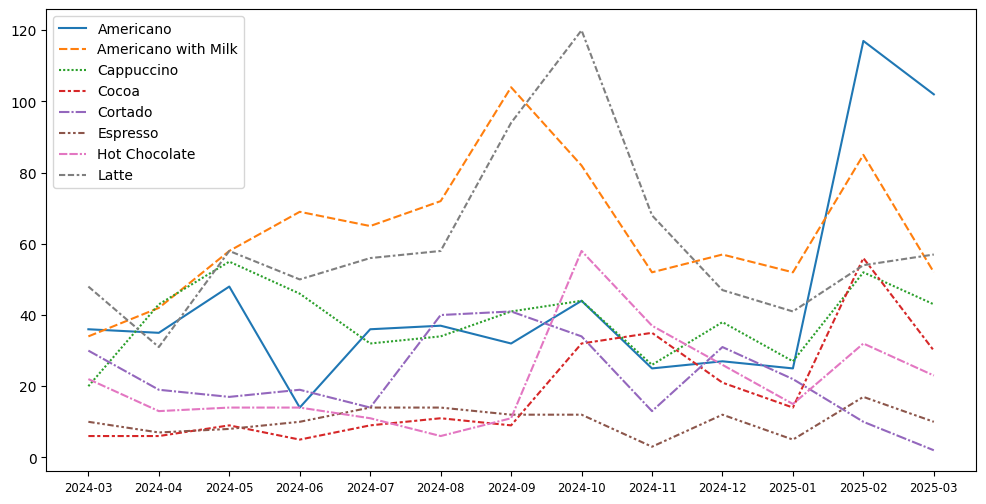

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')

As shown in the line chart above, Americano with Milk and Latte, and Cappuccino are top selling coffee types, while Cocoa and Expresso have lowest sales. Additionally, Americano with Milk and Latte show an upward trending.

In [ ]:
weekday_sales = coffee_data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,434
1,1,561
2,2,585
3,3,510
4,4,520
5,5,544
6,6,482


([<matplotlib.axis.XTick at 0x7ed11b52b190>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

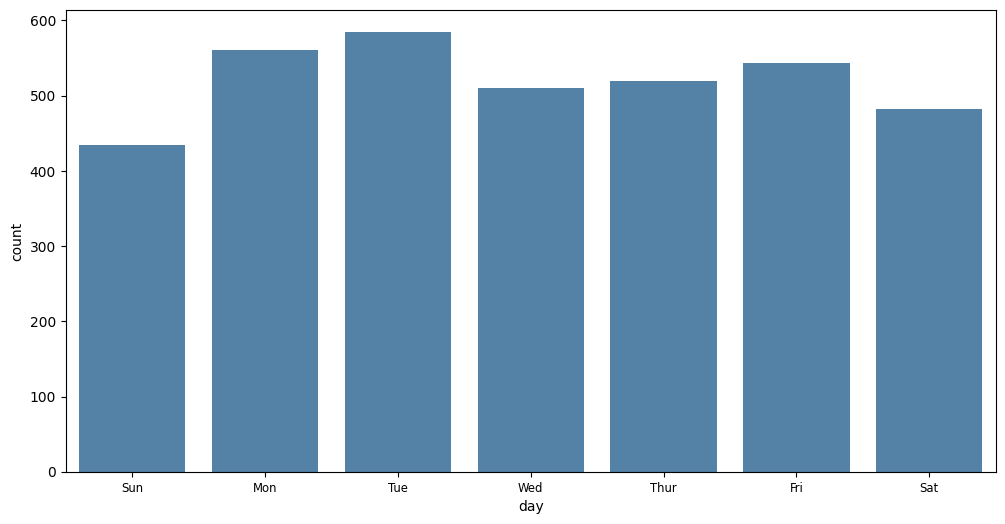

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day',y='count',color='steelblue')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')

The bar chart reveals that Tuesday has the highest sales of the week, while sales on the other days are relatively similar.

In [ ]:
daily_sales = coffee_data.groupby(['coffee_name','date']).count()['datetime'].reset_index().reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count').reset_index().fillna(0)
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
376,2025-03-19,8.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0
377,2025-03-20,8.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0
378,2025-03-21,7.0,2.0,4.0,0.0,0.0,0.0,1.0,6.0
379,2025-03-22,2.0,6.0,0.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,11.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,6.0
Cortado,0.0,5.0
Espresso,0.0,4.0
Hot Chocolate,0.0,7.0
Latte,0.0,9.0


This table provides us the infomation of how many of each products can be sold in each day.

In [ ]:
hourly_sales = coffee_data.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

,hour,count
0,06,5
1,07,91
2,08,235
3,09,247
4,10,349
5,11,294
6,12,249
7,13,227
8,14,228
9,15,245


<Axes: xlabel='hour', ylabel='count'>

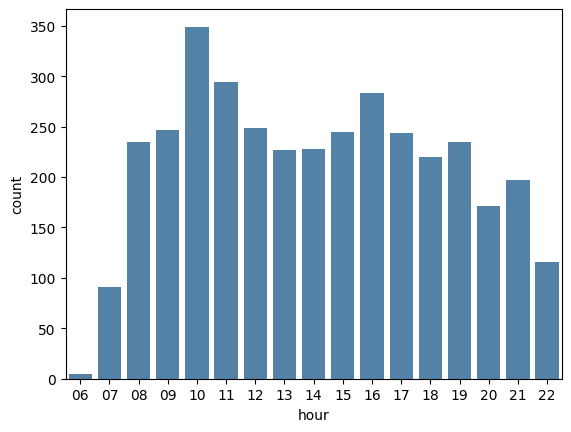

In [ ]:
sns.barplot(data=hourly_sales,x='hour',y='count',color='steelblue')

Overall, two peak hours within each day can be observed: 10:00am and 7:00pm. Then, let's check if any difference for different products.

In [ ]:
hourly_sales_by_coffee = coffee_data.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,06,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
1,07,14.0,19.0,20.0,4.0,2.0,2.0,0.0,30.0
2,08,48.0,51.0,22.0,15.0,41.0,6.0,5.0,47.0
3,09,28.0,95.0,23.0,16.0,33.0,10.0,7.0,35.0
4,10,60.0,102.0,30.0,8.0,34.0,13.0,21.0,81.0
5,11,73.0,67.0,30.0,16.0,35.0,15.0,17.0,41.0
6,12,56.0,57.0,29.0,14.0,22.0,15.0,9.0,47.0
7,13,46.0,56.0,32.0,11.0,24.0,7.0,10.0,41.0
8,14,45.0,44.0,36.0,17.0,16.0,10.0,13.0,47.0
9,15,48.0,48.0,32.0,8.0,12.0,13.0,19.0,65.0


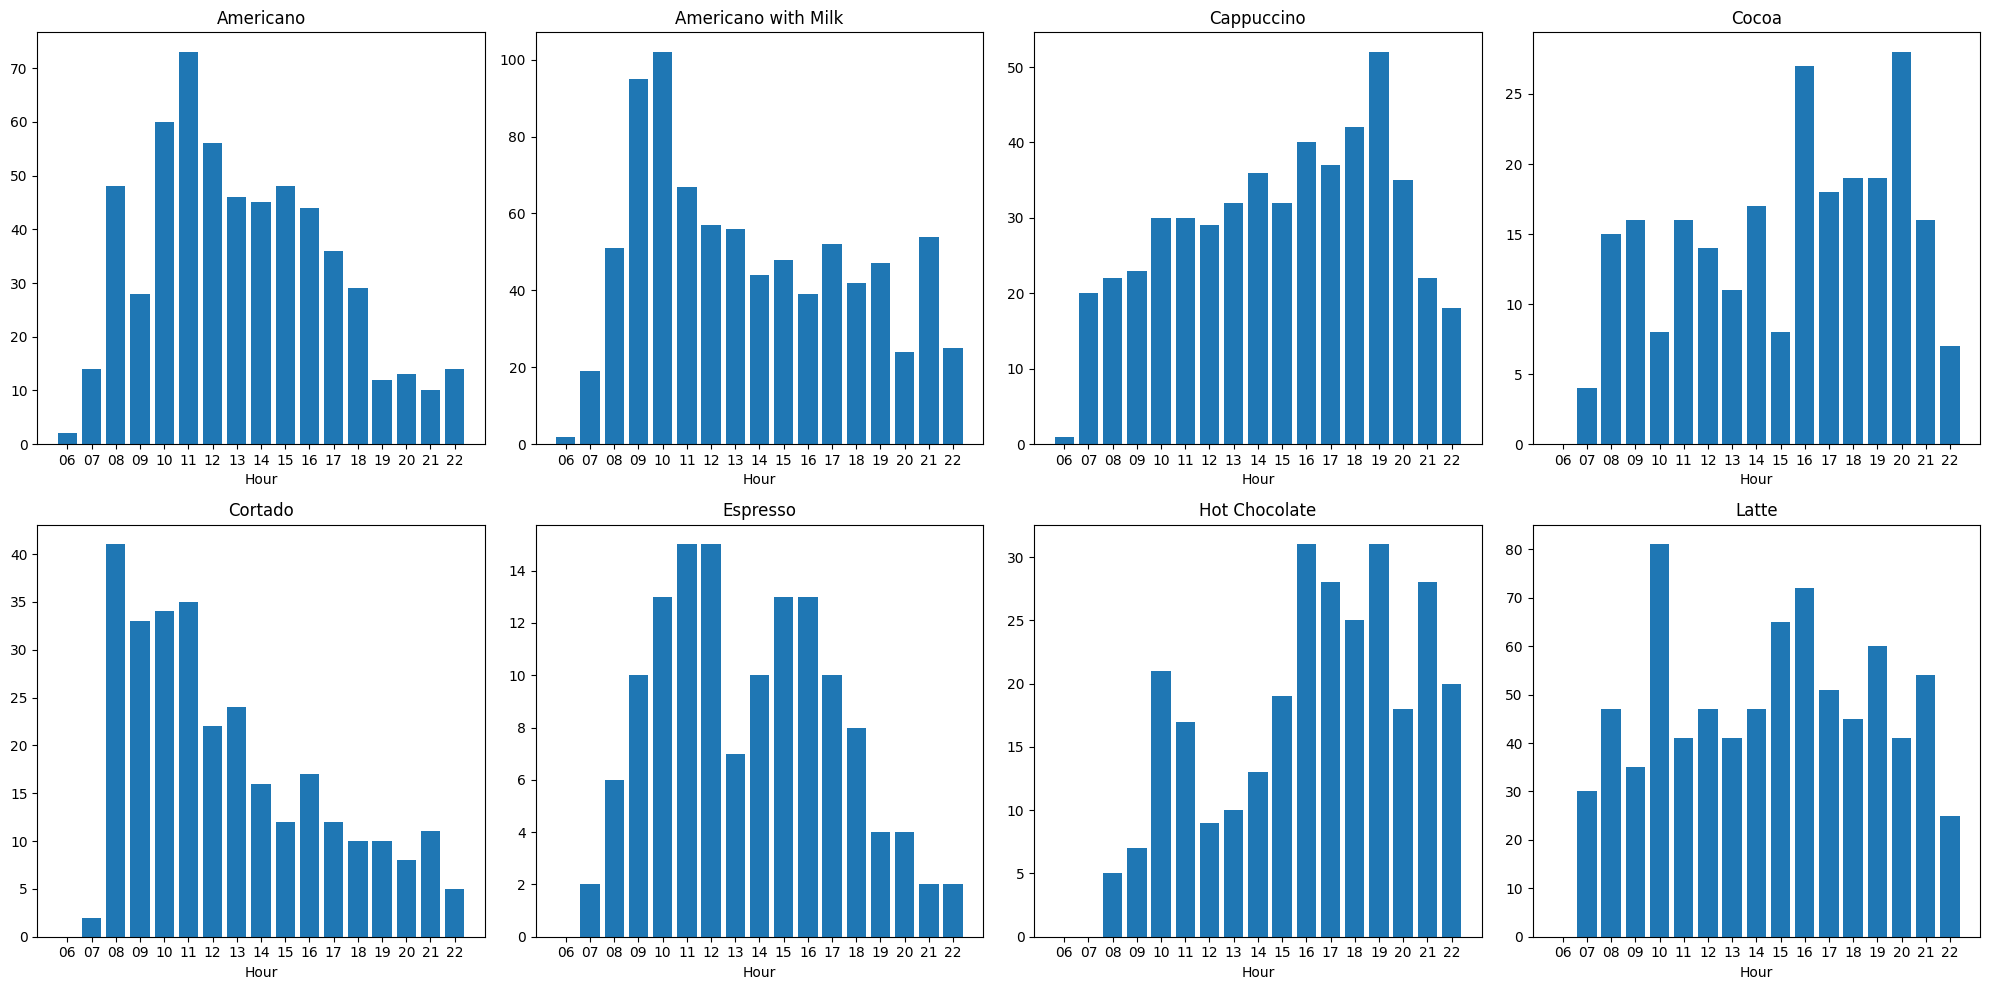

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the array of subplots for easy iteration
axs = axs.flatten()

# Loop through each column in the DataFrame, skipping the 'Index' column
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):  # Skip the first column ('Index')
    axs[i].bar(hourly_sales_by_coffee['hour'], hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
    #axs[i].set_ylabel('Sales')

plt.tight_layout()

# Show the plot
plt.show()

The plots above illustrate the shopping traffic for each product throughout the day. Notably, all products experience a peak in traffic around 10:00 AM, with this trend being particularly pronounced for Latte. Additionally, Cappuccino, Cocoa, and Hot Chocolate tend to be more popular during the evening hours, specifically between 6:00pm and 8:00pm.

## Conclusion

From the analysis above, we have uncovered valuable insights into customer shopping patterns on a daily and weekly basis. We have identified the most popular coffee products and observed the shopping trends over time. These findings are instrumental in optimizing inventory planning, designing the layout of vending machines, and determining the ideal restock times for coffee products.

In [ ]:
import os

# Assuming the data is extracted to a subdirectory within ihelon_coffee_sales_path
# Let's list the files in the downloaded directory to find the correct path
downloaded_files = os.listdir(ihelon_coffee_sales_path)
print(downloaded_files)

# If there's a subdirectory, list its contents as well
for item in downloaded_files:
    item_path = os.path.join(ihelon_coffee_sales_path, item)
    if os.path.isdir(item_path):
        print(f"Files in {item}: {os.listdir(item_path)}")

['index_1.csv', 'index_2.csv']
